<a href="https://colab.research.google.com/github/LegacYFTw/qurzon/blob/main/notebooks/CutQC_Workpad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
!pip3 install gurobipy
!pip3 install qiskit[visualization]
!pip3 install olsq
!pip3 install anytree

!pip3 install pytket
!pip3 install pytket-qiskit

     |████████████████████████████████| 11.1 MB 12.7 MB/s 
     |████████████████████████████████| 6.1 MB 10.4 MB/s 
     |████████████████████████████████| 18.0 MB 90 kB/s 
     |████████████████████████████████| 235 kB 49.6 MB/s 
     |████████████████████████████████| 207 kB 57.5 MB/s 
     |████████████████████████████████| 2.1 MB 51.0 MB/s 
     |████████████████████████████████| 162 kB 55.8 MB/s 
     |████████████████████████████████| 200 kB 43.0 MB/s 
     |████████████████████████████████| 635 kB 50.7 MB/s 
     |████████████████████████████████| 1.4 MB 48.1 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 943 kB 39.4 MB/s 
     |████████████████████████████████| 33.9 MB 19 kB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 3.0 MB 43.6 MB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.29.0-py3-none-any.whl size=1117

     |████████████████████████████████| 6.1 MB 26.6 MB/s 
     |████████████████████████████████| 234 kB 54.9 MB/s 
  Created wheel for pytket-qiskit: filename=pytket_qiskit-0.16.1-py3-none-any.whl size=36308 sha256=d9a0e5cc9b5c4679f2f22f3121083bd1c8534b9d608d882b435fe4b25c3c293e
  Stored in directory: /root/.cache/pip/wheels/ac/b0/ac/777e9de1a16577c6a42352291804dbc58171c78e98d87c8c44
  Created wheel for qiskit: filename=qiskit-0.28.0-py3-none-any.whl size=11091 sha256=0015888680d63447a0680c3a5164dda4047e03d6d01a522a8fb0e9d2655f7677
  Stored in directory: /root/.cache/pip/wheels/aa/7f/f7/f684068656b60591be96f758a6e80454a5ea5af86152598539
Successfully built pytket-qiskit qiskit
  Attempting uninstall: qiskit-terra
    Found existing installation: qiskit-terra 0.18.1
    Uninstalling qiskit-terra-0.18.1:
      Successfully uninstalled qiskit-terra-0.18.1
  Attempting uninstall: qiskit-ibmq-provider
    Found existing installation: qiskit-ibmq-provider 0.16.0
    Uninstalling qiskit-ibmq-

In [ ]:
!git clone https://github.com/weiT1993/qiskit_helper_functions
!cd qiskit_helper_functions && git checkout e046beac78563e9d75abcfde629565d149085983
!cp -r qiskit_helper_functions/* ./ && python3 setup.py install

Cloning into 'qiskit_helper_functions'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 391 (delta 239), reused 269 (delta 117), pack-reused 0
Receiving objects: 100% (391/391), 72.47 KiB | 6.59 MiB/s, done.
Resolving deltas: 100% (239/239), done.
Note: checking out 'e046beac78563e9d75abcfde629565d149085983'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at e046bea removed aqua
running install
running bdist_egg
running egg_info
creating qiskit_helper_functions.egg-info
writing qiskit_helper_functions.egg-info/PKG-INFO

In [ ]:
!pip unstall CutQC
!git clone https://github.com/weiT1993/CutQC
!cd CutQC && git checkout 6629a3696bea8ef3aa90dddfc021782859113377
!cp -r CutQC/* ./ && python3 setup.py install

ERROR: unknown command "unstall" - maybe you meant "uninstall"
Cloning into 'CutQC'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 372 (delta 127), reused 365 (delta 120), pack-reused 0
Receiving objects: 100% (372/372), 230.67 KiB | 9.23 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Note: checking out '6629a3696bea8ef3aa90dddfc021782859113377'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 6629a36 added numpy postprocess
running install
running bdist_egg
running egg_info
creating CutQC.egg-info
writing Cu

# Code

In [ ]:
from qiskit.quantum_info import random_unitary
from qiskit.circuit.random import random_circuit
from qiskit_helper_functions.non_ibmq_functions import generate_circ
from qiskit_helper_functions.non_ibmq_functions import apply_measurement
from qiskit_helper_functions.conversions import dict_to_array

from cutqc.cutter import find_cuts
from cutqc.post_process import generate_summation_terms, get_naive_overhead # build
from cutqc.evaluator import run_subcircuit_instances
from cutqc.verify import verify

from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from anytree.search import findall_by_attr

from pprint import pprint

from cutqc.cutter import subcircuits_parser, get_pairs, get_counter, cost_estimate
from cutqc.evaluator import modify_subcircuit_instance, mutate_measurement_basis, measure_prob

In [ ]:
types = [
         # qiskit_helper_functions
         "bv",
         "supremacy",
         "supremacy_linear",
         "hwea",
         "qft",
         "aqft",
         "sycamore",
         "adder",
         "grover",
         "random",

         # qiskit.circuit.random
         "qiskit-random"
    ]

def generate_circuit(register_size = 12, circuit_type = "bv", **kwargs):

    if not circuit_type in types:
        raise Exception("Unknown circuit type.")

    if circuit_type == "qiskit-random":
        return random_circuit(register_size, register_size*3, conditional=True, measure=True)

    return generate_circ(full_circ_size=register_size, circuit_type=circuit_type, **kwargs)

def run_batch(definition, batch = 5, context = {}):
    return timeit.repeat(stmt="definition()", setup="", repeat=batch, number = batch, globals={ **globals(), **context, "definition": definition })


def avg(arr):
    return sum(arr) / len(arr)

In [ ]:
def cut(circuit, verbose = True):

    sub_circuit_max = circuit.num_qubits

    # 6 is the max limit for `Gurobi` Optimier.
    if sub_circuit_max > 6:
        sub_circuit_max = 6

    circuit_const = int( circuit.size() / circuit.num_qubits )
    max_subcircuit_width = circuit.num_qubits + circuit_const
    max_subcircuit_cuts = circuit.num_qubits
    max_subcircuit_size = circuit.size() + circuit_const
    quantum_cost_weight = 1.0
    max_cuts = circuit.num_qubits - 2

    num_subcircuits = [s for s in range(2, sub_circuit_max)]

    kwargs = {
        "max_subcircuit_width": max_subcircuit_width,
        "max_subcircuit_cuts": max_subcircuit_cuts,
        "max_subcircuit_size": max_subcircuit_size,
        "quantum_cost_weight": quantum_cost_weight,
        "max_cuts": max_cuts,
        "num_subcircuits": num_subcircuits
    }
    
    return find_cuts(circuit=circuit, **kwargs, verbose=verbose)


def recursive_cut(circuit, callback=None, prefix='cut1', parent_node=None, min_qubit=None):
    if parent_node:
        node = Node(prefix, parent=parent_node)
    else:
        node = Node(prefix)

    cuts = cut(circuit, False)
    all_cuts = cuts.get('subcircuits', [])
    
    if len(all_cuts) < 2:
        if callback:
            callback(node, circuit, prefix)
        # print(f"Final Node : {prefix}")
        node.data = circuit
        return node
    else:
        node.data = circuit

        if min_qubit:
            if circuit.num_qubits <= min_qubit:
                if callback:
                    callback(node, circuit, prefix)
                return node

        node.complete_path_map = cuts.get('complete_path_map', {})
        node.cuts = cuts
        
        # if callback:
        #     callback(node, circuit, prefix)
        
        postfix = 0
        for circ in all_cuts:
            postfix = postfix + 1
            recursive_cut(circ, callback, prefix + str(postfix), node, min_qubit)
    
    return node

In [ ]:
def get_target_from_path(n, graph):

    key = [ k for k in filter ( lambda obj: obj.index == n, list(graph.keys()) )]

    return key, graph[key]

def get_mapped_from_path(subcircuit_idx, n, graph):

    def check(obj):
        for o in obj:
            if ( o['subcircuit_idx'] == subcircuit_idx ) and ( o['subcircuit_qubit'].index == n ):
                return True
        return False

    key = [ k for k in filter ( lambda obj: check(graph[obj]), list(graph.keys()) )]
    key = key[0]

    return key, graph[key]

def graph_output_circuit_nums(graph):
    size = []
    for val in graph.values():
        for v in val:
            size += [ v['subcircuit_idx'] ]
    return len(set(size))

def graph_output_circuit_ids(graph):
    size = []
    for val in graph.values():
        for v in val:
            size += [ v['subcircuit_idx'] ]
    return list(set(size))

def graph_input_circuit_size(graph):
    return list(graph.keys())[0].register.size

def get_cut_from_graph(graph):
    return [ mappings for mappings in list(graph.values()) if len(mappings) > 1][0]


def get_cut_idx(cut, graph):
    for channel in cut:
        if channel['subcircuit_qubit'] in graph:
            return channel['subcircuit_idx']
    return False


def clean_name_tree(node):
    if node.is_leaf:
        node.name = "node" + node.name[3:]
    [ clean_name_tree(child) for child in node.children ]
    return node

def get_solution(circuit, subcircuits, complete_path_map):

    # subcircuits, complete_path_map = subcircuits_parser(subcircuit_gates=subcircuits, circuit=circuit)
    O_rho_pairs = get_pairs(complete_path_map=complete_path_map)
    counter = get_counter(subcircuits=subcircuits, O_rho_pairs=O_rho_pairs)
    quantum_cost, classical_cost = cost_estimate(counter=counter)
    max_subcircuit_width = max([subcircuit.width() for subcircuit in subcircuits])

    cut_solution = {
        'max_subcircuit_width':max_subcircuit_width,
        'subcircuits':subcircuits,
        'complete_path_map':complete_path_map,
        'num_cuts':len(O_rho_pairs),
        'counter':counter,
        'classical_cost':classical_cost,
        'quantum_cost':quantum_cost}

    return cut_solution

def get_complete_path_map(pnode): # node_stack, circuit_stack, circuit):
    # 1.) get pnode->path_map
    # 2.) get (!pnode->is_leaf)=>(return pnode->path_map + pnode.children->get_complete_path_map without None)
    # 3.) 
    # 4.) (pnode->is_leaf)=>return none
    # complete_path_map

    if not pnode.is_leaf:
        child_path_map = [ get_complete_path_map(child) for child in pnode.children ]
        child_path_map = [ (child) for child in child_path_map if child ]
        if child_path_map:

            if len(child_path_map) == 1:
                child_path_map = child_path_map[0]
                return combine_path_map(pnode.complete_path_map, child_path_map)
            else:
                map = combine_path_map(pnode.complete_path_map, child_path_map[0])
                for i in range(1, len(child_path_map)):
                    map = combine_path_map(pnode.complete_path_map, child_path_map[i])
                child_path_map = map
                return child_path_map
        else:
            return pnode.complete_path_map
    else:
        return None


def combine_path_map(parent_path_map, child_path_map):

    result = parent_path_map

    reconstructed_map = {}

    parent_size = graph_output_circuit_nums(parent_path_map)
    child_size = graph_output_circuit_nums(child_path_map)
    total_size = parent_size + child_size

    circuit_piece = [ i for i in range(total_size + 1) ]

    parent_input_size = graph_input_circuit_size(parent_path_map)
    child_input_size  = graph_input_circuit_size(child_path_map)

    parent_piece_mapping = {}
    child_piece_mapping = {}

    cut = get_cut_from_graph(parent_path_map)
    cut_point = get_cut_idx(cut, list(child_path_map.keys()))
    end_point = child_size 

    parent_piece_mapping.update({ f:f for f in range(0, cut_point) })
    child_piece_mapping.update({ (f-cut_point):f for f in range(cut_point, end_point + cut_point) })
    parent_piece_mapping.update({(f-end_point + 1):f for f in range(end_point + cut_point, total_size - 1) })

    child_path_map_remapped = {}
    for key, values in child_path_map.items():
        remapped_values = []
        for piece in values:
            remapped_values += [{ 'subcircuit_idx': child_piece_mapping[ piece['subcircuit_idx'] ], 'subcircuit_qubit': piece['subcircuit_qubit'] }]
        child_path_map_remapped[key] = remapped_values

    parent_path_map_remapped = parent_path_map

    reconstructed_map = {}
    for qubit, qubit_to_sub_circuit_map in parent_path_map_remapped.items():
        map = qubit_to_sub_circuit_map
        join = []
        remove = []
        for index, connection in enumerate(qubit_to_sub_circuit_map):
            if connection['subcircuit_qubit'] in list( child_path_map_remapped.keys() ) and cut_point == connection['subcircuit_idx']:
                add_this = child_path_map_remapped[ connection['subcircuit_qubit'] ]
                join += add_this
            else:
                add_this = connection
                add_this['subcircuit_idx'] = parent_piece_mapping[add_this['subcircuit_idx']]
                join += [ add_this ]
            remove += [connection]

        [ map.remove(con) for con in remove ]

        map += join
        reconstructed_map[qubit] =  map
    
    new_output_map = { value: key for (key, value) in enumerate(graph_output_circuit_ids(reconstructed_map)) }
    reconstructed_map_correction = {}
    for key, values in reconstructed_map.items():
        remapped_values = []
        for piece in values:
            remapped_values += [{ 'subcircuit_idx': new_output_map[ piece['subcircuit_idx'] ], 'subcircuit_qubit': piece['subcircuit_qubit'] }]
        reconstructed_map_correction[key] = remapped_values


    return reconstructed_map_correction


In [ ]:
from time import time
import itertools, copy

import numpy as np

from qiskit import IBMQ, transpile, Aer, execute

from qiskit.providers.aer import noise
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit.test.mock import FakeBackend, FakeTokyo, FakeVigo, FakeMelbourne, FakePoughkeepsie, FakeQasmSimulator, FakeRueschlikon, FakeTenerife

available_backend = {
    "FakeTokyo": FakeTokyo, 
    "FakeVigo": FakeVigo, 
    "FakeMelbourne": FakeMelbourne, 
    "FakePoughkeepsie": FakePoughkeepsie, 
    "FakeRueschlikon": FakeRueschlikon, 
    "FakeTenerife": FakeTenerife
}

def get_backend_name(backend):
    for name, device in available_backend.items():
        if device is backend:
            return name
    raise Exception("Backend Error: No specified vackend found.")

def evaluate_circ(circuit, backend, options=None):
    if backend in available_backend:
        backend = available_backend[backend]()
        noise_model = noise.NoiseModel.from_backend(backend)
        if isinstance(options,dict) and 'num_shots' in options:
            num_shots = options['num_shots']
        else:
            num_shots = max(1024,2**circuit.num_qubits)
        if isinstance(options,dict) and 'memory' in options:
            memory = options['memory']
        else:
            memory = False
        if circuit.num_clbits == 0:
            circuit = apply_measurement(circuit=circuit,qubits=circuit.qubits)
        job = execute(circuit, backend=backend, noise_model=noise_model, shots=num_shots, memory=memory).result()
        if memory:
            qasm_memory = np.array(job.get_memory(0))
            assert len(qasm_memory)==num_shots
            return qasm_memory
        else:
            counts = job.get_counts(0)
            assert sum(counts.values())==num_shots
            counts = dict_to_array(distribution_dict=counts,force_prob=True)
            return counts
    if type(backend) is str:
        if backend=='statevector_simulator':
            backend = Aer.get_backend('statevector_simulator')
            job = execute(circuit, backend=backend, optimization_level=0)
            result = job.result()
            output_sv = result.get_statevector(circuit)
            output_p = []
            for x in output_sv:
                amplitude = np.absolute(x)**2
                if amplitude>1e-16:
                    output_p.append(amplitude)
                else:
                    output_p.append(0)
            output_p = np.array(output_p)
            return output_p
        elif backend == 'noiseless_qasm_simulator':
            if isinstance(options,dict) and 'num_shots' in options:
                num_shots = options['num_shots']
            else:
                num_shots = max(1024,2**circuit.num_qubits)
            backend = Aer.get_backend('qasm_simulator')

            if isinstance(options,dict) and 'memory' in options:
                memory = options['memory']
            else:
                memory = False
            if circuit.num_clbits == 0:
                circuit = apply_measurement(circuit=circuit,qubits=circuit.qubits)
            noiseless_qasm_result = execute(circuit, backend, shots=num_shots, memory=memory).result()

            if memory:
                qasm_memory = np.array(noiseless_qasm_result.get_memory(0))
                assert len(qasm_memory)==num_shots
                return qasm_memory
            else:
                noiseless_counts = noiseless_qasm_result.get_counts(0)
                assert sum(noiseless_counts.values())==num_shots
                noiseless_counts = dict_to_array(distribution_dict=noiseless_counts,force_prob=True)
                return noiseless_counts
        elif backend=='noisy_qasm_simulator':
            noisy_qasm_result = execute(circuit, Aer.get_backend('qasm_simulator'),
            coupling_map=options['coupling_map'],
            basis_gates=options['basis_gates'],
            noise_model=options['noise_model'],
            shots=options['num_shots']).result()

            noisy_counts = noisy_qasm_result.get_counts(0)
            assert sum(noisy_counts.values())==options['num_shots']
            noisy_counts = dict_to_array(distribution_dict=noisy_counts,force_prob=True)
            return noisy_counts
        else:
            raise NotImplementedError

def simulate_subcircuit(subcircuit,eval_mode,num_shots):
    '''
    Simulate a subcircuit
    '''
    if eval_mode=='sv':
        subcircuit_inst_prob = evaluate_circ(circuit=subcircuit,backend='statevector_simulator')
    elif eval_mode=='qasm':
        subcircuit_inst_prob = evaluate_circ(circuit=subcircuit,backend='noiseless_qasm_simulator',options={'num_shots':num_shots})
    else:
        subcircuit_inst_prob = evaluate_circ(circuit=subcircuit,backend=get_backend_name(eval_mode),options={'num_shots':num_shots})
    return subcircuit_inst_prob

def naive_compute(subcircuit_order, summation_terms, subcircuit_entry_probs):
	try:
		import cupy as cp
		CUDA = True
	except:
		import numpy as np
		CUDA = False
	reconstructed_prob = None
	for idx in range(len(summation_terms)):
		summation_term = summation_terms[idx]
		summation_term_prob = None
		for subcircuit_idx in subcircuit_order:
			subcircuit_entry_idx = summation_term[subcircuit_idx]
			subcircuit_entry_prob = subcircuit_entry_probs[subcircuit_idx][subcircuit_entry_idx]
			if summation_term_prob is None:
				summation_term_prob = subcircuit_entry_prob
			else:
				if CUDA:
					summation_term_prob = cp.array(summation_term_prob)
					subcircuit_entry_prob = cp.array(subcircuit_entry_prob)
					summation_term_prob = cp.kron(summation_term_prob,subcircuit_entry_prob)
					summation_term_prob = cp.asnumpy(summation_term_prob)
				else:
					summation_term_prob = np.kron(summation_term_prob,subcircuit_entry_prob)
                    
		if reconstructed_prob is None:
			reconstructed_prob = summation_term_prob
		else:
			reconstructed_prob += summation_term_prob
	return reconstructed_prob

def build(summation_terms, subcircuit_entry_probs, num_cuts, counter, verbose):
	min_overhead = float('inf')
	for subcircuit_order in itertools.permutations(range(len(subcircuit_entry_probs))):
		overhead = get_naive_overhead(subcircuit_order=subcircuit_order,num_cuts=num_cuts,counter=counter)
		if overhead['additions']+overhead['multiplications']<min_overhead:
			smart_order = subcircuit_order
			min_overhead = overhead['additions']+overhead['multiplications']
			if verbose:
				print('subcircuit_order {}. overhead = {}.'.format(subcircuit_order,overhead))
	
	reconstructed_prob = naive_compute(subcircuit_order, summation_terms, subcircuit_entry_probs)
	reconstructed_prob /= 2**num_cuts
	return reconstructed_prob, smart_order

def get_backend_name_from_stack(backend_run_stack, circuit):
    for key, values in backend_run_stack.items():
        if circuit in values:
            return key
    return 'sv'

def run_subcircuit_instances(subcircuits,subcircuit_instances,eval_mode,num_shots_fn, backend_run_stack=None):
    '''
    subcircuit_instance_probs[subcircuit_idx][subcircuit_instance_idx] = measured probability
    '''
    subcircuit_instance_probs = {}
    for subcircuit_idx in subcircuit_instances:
        subcircuit_instance_probs[subcircuit_idx] = {}
        num_shots = num_shots_fn(subcircuits[subcircuit_idx])
        for init_meas in subcircuit_instances[subcircuit_idx]:
            subcircuit_instance_idx = subcircuit_instances[subcircuit_idx][init_meas]
            if subcircuit_instance_idx not in subcircuit_instance_probs[subcircuit_idx]:
                # print('Subcircuit %d instance %d'%(subcircuit_idx,subcircuit_instance_idx))
                subcircuit_instance = modify_subcircuit_instance(
                    subcircuit=subcircuits[subcircuit_idx],
                    init=init_meas[0],meas=init_meas[1])
                if backend_run_stack:
                    subcircuit_inst_prob = simulate_subcircuit(subcircuit=subcircuit_instance,eval_mode=get_backend_name_from_stack(backend_run_stack, subcircuits[subcircuit_idx]),num_shots=num_shots)
                else:
                    subcircuit_inst_prob = simulate_subcircuit(subcircuit=subcircuit_instance,eval_mode=eval_mode,num_shots=num_shots)
                mutated_meas = mutate_measurement_basis(meas=init_meas[1])
                for meas in mutated_meas:
                    measured_prob = measure_prob(unmeasured_prob=subcircuit_inst_prob,meas=meas)
                    mutated_subcircuit_instance_idx = subcircuit_instances[subcircuit_idx][(init_meas[0],meas)]
                    subcircuit_instance_probs[subcircuit_idx][mutated_subcircuit_instance_idx] = measured_prob
                    # print('Measured instance %d'%mutated_subcircuit_instance_idx)
    return subcircuit_instance_probs

def summation(subcircuits, complete_path_map, num_cuts, full_circuit):
    return generate_summation_terms(subcircuits, complete_path_map, num_cuts)

def _attribute_shots(summation_terms, subcircuit_entries, subcircuit_instances, subcircuits, backend=None, backend_run_stack=None):
    '''
    eval_mode = qasm: simulate shots
    eval_mode = sv: statevector simulation
    num_shots_fn: a function that gives the number of shots to take for a given circuit
    '''
    eval_mode = 'sv'
    if backend:
        eval_mode = backend
    def constant_shots_fn(circuit):
        return 1024
    num_shots_fn = constant_shots_fn
    print("subcircuits : ", [ circ.num_qubits for circ in subcircuits ])
    print("subcircuit_instances : ", subcircuit_instances)
    subcircuit_instance_probs = run_subcircuit_instances(subcircuits=subcircuits,subcircuit_instances=subcircuit_instances, eval_mode=eval_mode,num_shots_fn=num_shots_fn, backend_run_stack=backend_run_stack)
    print("subcircuit_instance_probs : ", [ f"{key}: {len(proba)}    " for key, proba in subcircuit_instance_probs.items() ])

    subcircuit_entry_probs = {}
    for subcircuit_idx in subcircuit_entries:
        subcircuit_entry_probs[subcircuit_idx] = {}
        for label in subcircuit_entries[subcircuit_idx]:
            subcircuit_entry_idx, kronecker_term = subcircuit_entries[subcircuit_idx][label]
            # print('Subcircuit {:d} entry {:d} kronecker_term {}'.format(
            #     subcircuit_idx, subcircuit_entry_idx, kronecker_term
            # ))
            subcircuit_entry_prob = None
            for term in kronecker_term:
                coefficient, subcircuit_instance_idx = term
                if subcircuit_entry_prob is None:
                    subcircuit_entry_prob = coefficient * subcircuit_instance_probs[subcircuit_idx][subcircuit_instance_idx]
                else:
                    subcircuit_entry_prob += coefficient * subcircuit_instance_probs[subcircuit_idx][subcircuit_instance_idx]
            subcircuit_entry_probs[subcircuit_idx][subcircuit_entry_idx] = subcircuit_entry_prob
    return subcircuit_entry_probs

def reconstruct(subcircuits, complete_path_map, full_circuit, backend = None, backend_run_stack=None):

    num_cuts = graph_output_circuit_nums(complete_path_map) - 1

    summation_terms, subcircuit_entries, subcircuit_instances = generate_summation_terms(subcircuits, complete_path_map, num_cuts)

    cuts = get_solution(full_circuit, subcircuits, complete_path_map)

    if backend:
        subcircuit_entry_probs = _attribute_shots(summation_terms, subcircuit_entries, subcircuit_instances, subcircuits, backend=backend)
    if backend_run_stack:
        subcircuit_entry_probs = _attribute_shots(summation_terms, subcircuit_entries, subcircuit_instances, subcircuits, backend_run_stack=backend_run_stack)

    reconstructed_prob, smart_order = build(summation_terms, subcircuit_entry_probs, num_cuts, cuts['counter'], True)

    unordered_prob = reconstructed_prob
    reconstructed_output, metrics = verify(full_circuit=full_circuit,
                unordered=unordered_prob,
                complete_path_map=cuts['complete_path_map'],
                subcircuits=subcircuits,
                smart_order=smart_order)
    return reconstructed_output, metrics


In [ ]:
node_stack = {}
circuit_stack = {}
 
def callback(node, circuit, prefix):
    circuit_stack[prefix] = circuit
    node_stack[prefix] = node

circuit = generate_circuit( 12, "bv" )
pnode = recursive_cut(circuit, callback=callback, min_qubit=3)
clean_name_tree(pnode)

for pre, fill, node in RenderTree(pnode):
    print("%s%s" % (pre, node.name + " : " + str(node.data.num_qubits)))

complete_path_map = get_complete_path_map(pnode)
solution = get_solution(circuit, list(circuit_stack.values()), complete_path_map)

# pprint(solution)


subcircuits = list( circuit_stack.values() )
reconstructed_output, metrics = reconstruct(subcircuits, complete_path_map, circuit, backend=FakeTokyo)

pprint(metrics)

Restricted license - for non-production use only - expires 2022-01-13
cut1 : 12
├── cut11 : 9
│   ├── cut111 : 6
│   │   ├── cut1111 : 4
│   │   │   ├── node11111 : 2
│   │   │   └── node11112 : 3
│   │   └── node1112 : 3
│   └── cut112 : 4
│       ├── node1121 : 2
│       └── node1122 : 3
└── cut12 : 4
    ├── node121 : 2
    └── node122 : 3
subcircuits :  [2, 3, 3, 2, 3, 2, 3]
subcircuit_instances :  {0: {(('zero', 'zero'), ('comp', 'I')): 0, (('zero', 'zero'), ('comp', 'X')): 1, (('zero', 'zero'), ('comp', 'Y')): 2, (('zero', 'zero'), ('comp', 'Z')): 3}, 1: {(('zero', 'zero', 'zero'), ('comp', 'comp', 'I')): 0, (('zero', 'zero', 'one'), ('comp', 'comp', 'I')): 1, (('zero', 'zero', 'plus'), ('comp', 'comp', 'I')): 2, (('zero', 'zero', 'plusI'), ('comp', 'comp', 'I')): 3, (('zero', 'zero', 'zero'), ('comp', 'comp', 'X')): 4, (('zero', 'zero', 'one'), ('comp', 'comp', 'X')): 5, (('zero', 'zero', 'plus'), ('comp', 'comp', 'X')): 6, (('zero', 'zero', 'plusI'), ('comp', 'comp', 'X')): 7, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.


subcircuit_instance_probs :  ['0: 4    ', '1: 16    ', '2: 16    ', '3: 16    ', '4: 16    ', '5: 16    ', '6: 4    ']
subcircuit_order (0, 1, 2, 3, 4, 5, 6). overhead = {'additions': 16773120, 'multiplications': 20348928}.
subcircuit_order (0, 1, 2, 3, 5, 4, 6). overhead = {'additions': 16773120, 'multiplications': 19824640}.
subcircuit_order (0, 1, 3, 2, 5, 4, 6). overhead = {'additions': 16773120, 'multiplications': 19759104}.
subcircuit_order (0, 1, 3, 5, 2, 4, 6). overhead = {'additions': 16773120, 'multiplications': 19628032}.
subcircuit_order (0, 3, 1, 5, 2, 4, 6). overhead = {'additions': 16773120, 'multiplications': 19611648}.
subcircuit_order (0, 3, 5, 1, 2, 4, 6). overhead = {'additions': 16773120, 'multiplications': 19578880}.
{'naive': {'Cross Entropy': 2.678769959757899,
           'HOP': 0.06864754148227782,
           'Mean Absolute Percentage Error': 227380971317803.12,
           'Mean Squared Error': 0.00021317235882506357,
           'chi2': 1.7430488956646646},
 'n

In [ ]:
from pytket.routing import Architecture, route, place_with_map
from pytket.transform import Transform
from pytket.routing import Placement, LinePlacement, GraphPlacement, NoiseAwarePlacement
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit

def Tket(circuit, backend = None, transform = False):
    pytket_circ = qiskit_to_tk(circuit)

    if not backend in list(available_backend.values()):
        raise Exception(f"Backend `{backend}` is not valid")

    backend = backend()
    check_chip_compatiblity(backend, circuit) # Validate Chip Size to Circuit Size

    if transform:
        Transform.RemoveRedundancies().apply(physical_c)
        Transform.OptimisePostRouting().apply(physical_c)
        Transform.RebaseToQiskit().apply(physical_c)


    arc = Architecture(backend._configuration.coupling_map)

    # placement = Placement(arc)
    # placement_map = placement.get_placement_map(pytket_circ)

    physical_c = route(pytket_circ, arc)

    # placement.place(physical_c)
    # place_with_map(pytket_circ, placement_map)

    final_circ = tk_to_qiskit(physical_c)

    return final_circ

from qiskit.circuit import QuantumRegister, Qubit
from pprint import pprint
def tket_path(pathmap):
    map = pathmap.copy()
    q_node = Qubit(QuantumRegister(6, 'q'), 0)
    q_node.register.size, q_node.index
    
    for key, values in map.items():
        for index, conn in enumerate(map[key]): 
            # {'subcircuit_idx': 0, 'subcircuit_qubit': Qubit(QuantumRegister(4, 'q'), 0)}
            qubit = conn['subcircuit_qubit']
            qubit = Qubit(QuantumRegister(qubit.register.size, 'node'), qubit.index)
            qubit._hash = pathmap[key][index]['subcircuit_qubit']._hash
            map[key][index]['subcircuit_qubit'] = qubit
    return map

from qiskit import QuantumCircuit, QuantumRegister
def tket_rename_nodes(circuit):
    qreg = QuantumRegister(circuit.num_qubits , 'q')
    if circuit.cregs:
        creg = QuantumRegister(len(circuit.cregs) , 'c')
        circ = QuantumCircuit(qreg, creg)
    else:
        circ = QuantumCircuit(qreg)

    for instr, qargs, cargs in circuit._data:
        qreg = [ reg.index for reg in qargs ]
        circ.append(instr, qreg)

    return circ

In [ ]:
# print(Tket(circuit, FakeTokyo).draw())
# tket_rename_nodes(Tket(circuit, FakeTokyo)).draw()

In [ ]:
from qiskit import QuantumCircuit, execute

class CircuitLargerThanChip(Exception):
    pass

def check_chip_compatiblity(backend, circuit, raise_exception=True):
    if backend._configuration.n_qubits < circuit.num_qubits:
        if raise_exception:
            raise CircuitLargerThanChip("Circuit is larger than chip size.")
        else:
            return False
    return True

class Schedular:
    def __init__(self, backend_list):
        self.backend_list = backend_list
        self.backend_sizes = { backend()._configuration.n_qubits: backend for backend in backend_list }
        self.backend_run_stack = { backend: [] for backend in backend_list }
        self.pnode = None
        self.smallest_chip_size = min([device()._configuration.n_qubits for device in backend_list])
        self.node_stack = {}
        self.circuit_stack = {}
        
    def callback(self, node, circuit, prefix):
        self.circuit_stack[prefix] = circuit
        self.node_stack[prefix] = node

    def __call__(self, circuit):
        self.pnode = recursive_cut(circuit, callback=self.callback, min_qubit=self.smallest_chip_size)
        [ self.alot(circuit) for circuit in list(self.circuit_stack.values()) ]

        # Distribute the circuit if some devices are free
        empty_devices = [backend for backend, run_stack in self.backend_run_stack.items() if len(run_stack) == 0]
        for devices in empty_devices:
            run_stack_size = [ len(run_stack) for backend, run_stack in self.backend_run_stack.items() ]
            most_busy = [ (backend, run_stack) for backend, run_stack in self.backend_run_stack.items() if len(run_stack) == max(run_stack_size) ]
            backend, run_stack = most_busy[0]
            size = len(run_stack)
            new_run_stack_1 = run_stack[:size//2]
            new_run_stack_2 = run_stack[size//2:]
            self.backend_run_stack[backend] = new_run_stack_1
            self.backend_run_stack[devices] = new_run_stack_2
        

        subcircuits = list( self.circuit_stack.values() )
        complete_path_map = get_complete_path_map(self.pnode)

        solution = get_solution(circuit, subcircuits, complete_path_map)
        reconstructed_output, metrics = reconstruct(subcircuits, complete_path_map, circuit, backend_run_stack = self.backend_run_stack)

        return (reconstructed_output, metrics) # self.backend_run_stack

    def alot(self, circuit):
        # Fill `backend_run_stack` in order from low to high
        size_list = list(self.backend_sizes.keys())
        size_list = list(sorted(list(size_list)))
        for size in size_list:
            backend = self.backend_sizes[size]
            if check_chip_compatiblity(backend(), circuit):
                self.backend_run_stack[backend] += [circuit]
                return backend
        raise Exception("Circuit too big for available devices.")

    def kernal(self, circuit):
        pass

In [ ]:
{ name:device()._configuration.n_qubits for name, device in available_backend.items() }

{'FakeMelbourne': 14,
 'FakePoughkeepsie': 20,
 'FakeRueschlikon': 16,
 'FakeTenerife': 5,
 'FakeTokyo': 20,
 'FakeVigo': 5}

In [ ]:
import pickle

def save(obj, filename):
    with open(f'{filename}.pickle', 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

metrics_list = []

backend_list = list(available_backend.values())

circuit_list = { f"cirucit [bv-{qubit}]": generate_circuit( qubit, "bv" ) for qubit in range(6, 24) }
for name, circ in circuit_list.items():
    schedule = Schedular(backend_list)
    reconstructed_output, metrics = schedule(circ)
    metrics_list += [ metrics ]
    save({"reconstructed_output": reconstructed_output, "metrics": metrics}, name)

subcircuits :  [4, 3]
subcircuit_instances :  {0: {(('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'I')): 0, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'X')): 1, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'Y')): 2, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'Z')): 3}, 1: {(('zero', 'zero', 'zero'), ('comp', 'comp', 'comp')): 0, (('zero', 'zero', 'one'), ('comp', 'comp', 'comp')): 1, (('zero', 'zero', 'plus'), ('comp', 'comp', 'comp')): 2, (('zero', 'zero', 'plusI'), ('comp', 'comp', 'comp')): 3}}
subcircuit_instance_probs :  ['0: 4    ', '1: 4    ']
subcircuit_order (0, 1). overhead = {'additions': 192, 'multiplications': 256}.
subcircuits :  [3, 5]
subcircuit_instances :  {0: {(('zero', 'zero', 'zero'), ('comp', 'comp', 'I')): 0, (('zero', 'zero', 'zero'), ('comp', 'comp', 'X')): 1, (('zero', 'zero', 'zero'), ('comp', 'comp', 'Y')): 2, (('zero', 'zero', 'zero'), ('comp', 'comp', 'Z')): 3}, 1: {(('zero', 'zero', 'zero', 'ze

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.


subcircuit_instance_probs :  ['0: 4    ', '1: 16    ', '2: 4    ']
subcircuit_order (0, 1, 2). overhead = {'additions': 3840, 'multiplications': 4608}.
subcircuits :  [4, 3, 4]
subcircuit_instances :  {0: {(('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'I')): 0, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'X')): 1, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'Y')): 2, (('zero', 'zero', 'zero', 'zero'), ('comp', 'comp', 'comp', 'Z')): 3}, 1: {(('zero', 'zero', 'zero'), ('comp', 'comp', 'I')): 0, (('zero', 'zero', 'one'), ('comp', 'comp', 'I')): 1, (('zero', 'zero', 'plus'), ('comp', 'comp', 'I')): 2, (('zero', 'zero', 'plusI'), ('comp', 'comp', 'I')): 3, (('zero', 'zero', 'zero'), ('comp', 'comp', 'X')): 4, (('zero', 'zero', 'one'), ('comp', 'comp', 'X')): 5, (('zero', 'zero', 'plus'), ('comp', 'comp', 'X')): 6, (('zero', 'zero', 'plusI'), ('comp', 'comp', 'X')): 7, (('zero', 'zero', 'zero'), ('comp', 'comp', 'Y')): 8, (('zero', 'zero', 'one'

In [ ]:
metrics_list[0]

{'naive': {'Cross Entropy': 1.1566534090169873,
  'HOP': 0.31453704833984375,
  'Mean Absolute Percentage Error': 1.071035861968994e+16,
  'Mean Squared Error': 0.008262061045058996,
  'chi2': 1.042896360396752},
 'nearest': {'Cross Entropy': 1.1566534090169873,
  'HOP': 0.31453704833984375,
  'Mean Absolute Percentage Error': 1.071035861968994e+16,
  'Mean Squared Error': 0.008262061045058996,
  'chi2': 1.042896360396752}}

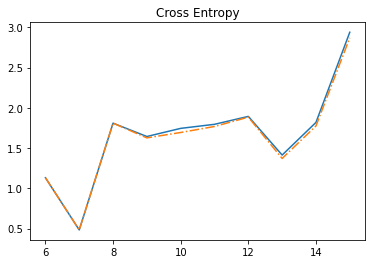

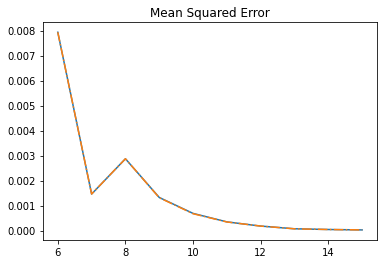

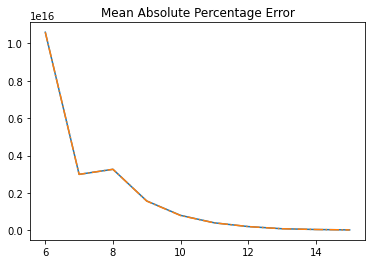

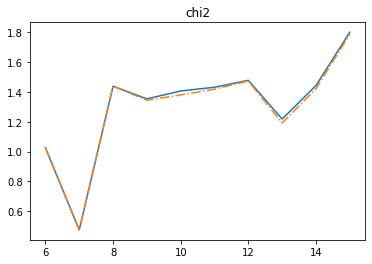

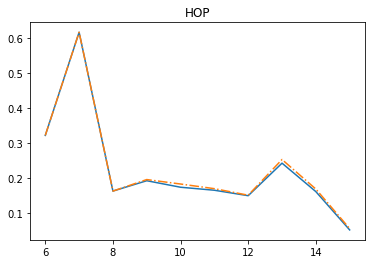

In [ ]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

def draw(line1, line2, title, start_from = 0):
    plt.plot([i for i in range(start_from, start_from+len(line1))], line1) # Plot the chart
    plt.plot([i for i in range(start_from, start_from+len(line2))], line2, '-.') # Plot the chart
    # plt.xlabel("X-axis data")
    # plt.ylabel("Y-axis data")
    plt.title(title)
    plt.show() # display

def plot_metric(metrics_list, column):
    hop_naive = [metric['naive'][column]  for metric in metrics_list]
    hop_nearest = [metric['nearest'][column]  for metric in metrics_list]

    draw(hop_naive, hop_nearest, column, 6)

plot_metric(metrics_list, 'Cross Entropy')
plot_metric(metrics_list, 'Mean Squared Error')
plot_metric(metrics_list, 'Mean Absolute Percentage Error')
plot_metric(metrics_list, 'chi2')
plot_metric(metrics_list, 'HOP')